# Table of Contents

* [Introduction](#Introduction)
* [Data Set Up](#Data-Set-Up)
* [Data View and Cleaning](#2.-Data-View-and-Cleaning)
* [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
* [Featurization](#Featurization)
* [Model Exploration](#Model-Exploration)
* [Conclusion](#Conclusion)
* [References](#References)

# Introduction

### Problem Statement

Predict prices of used cars on Cardekho

### Metrics Used:

* Coefficient of Determination

# Data  Set Up

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [148]:
data = pd.read_csv('car details.csv')

# 2. Data View and Cleaning

In [53]:
# View of Data

data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [10]:
# Number of cars models in the dataset

data['name'].value_counts()

Maruti Swift Dzire VDI             69
Maruti Alto 800 LXI                59
Maruti Alto LXi                    47
Hyundai EON Era Plus               35
Maruti Alto LX                     35
                                   ..
Tata Bolt Revotron XM               1
Maruti Ignis 1.2 AMT Delta BSIV     1
Volkswagen Polo GT 1.0 TSI          1
Volvo XC60 D3 Kinetic               1
Mahindra TUV 300 T8 AMT             1
Name: name, Length: 1491, dtype: int64

## Null Values Check

In [11]:
data.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [12]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## Duplicate Check

In [13]:
data.duplicated().value_counts()

False    3577
True      763
dtype: int64

In [37]:
data.drop('name', axis=1).duplicated().value_counts()

False    3498
True      842
dtype: int64

In [15]:
data.duplicated().value_counts()

False    3577
True      763
dtype: int64

In [14]:
data[data.duplicated() == True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [34]:
data = data.drop_duplicates()

# 3. Exploratory Data Analysis

In [4]:
# View Data

data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [53]:
# Number of Car Models in the data with their frequencies

data['name'].value_counts()

Maruti Swift Dzire VDI               69
Maruti Alto 800 LXI                  59
Maruti Alto LXi                      47
Hyundai EON Era Plus                 35
Maruti Alto LX                       35
                                     ..
Volkswagen CrossPolo 1.2 MPI          1
Renault KWID RXT BSIV                 1
BMW 5 Series 530i                     1
Chevrolet Enjoy TCDi LTZ 7 Seater     1
Mahindra Xylo E8 ABS Airbag BSIV      1
Name: name, Length: 1491, dtype: int64

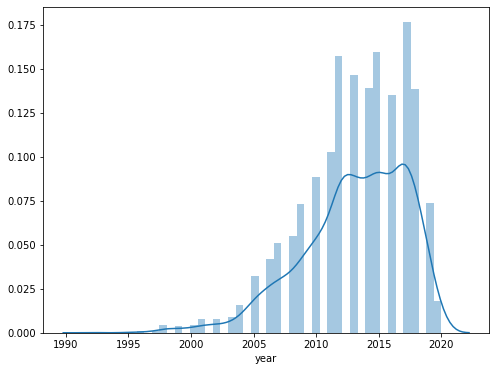

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [87]:
# Distribtion of 'year' in which the cars were purchased

plt.figure(figsize=(8,6))
sns.distplot(data['year'])
plt.show()

data['year'].value_counts()

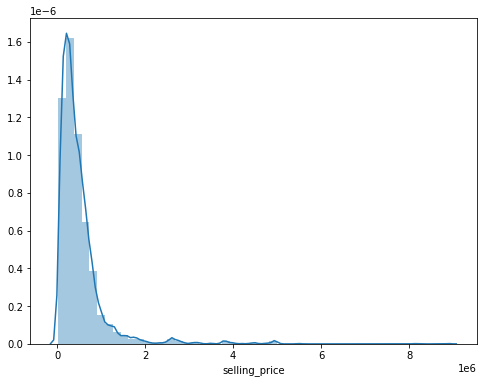

In [91]:
# Distribtion of 'selling Price' of cars

plt.figure(figsize=(8,6))
sns.distplot(data['selling_price'])
plt.show()

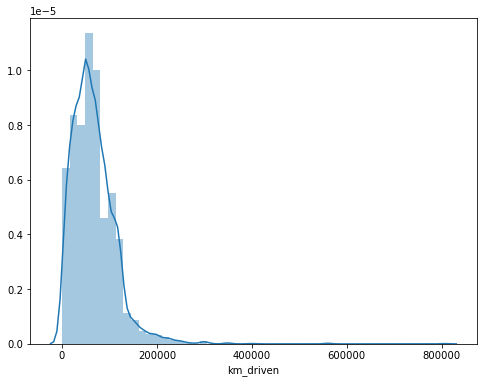

In [92]:
# Distribtion of 'km_driven'

plt.figure(figsize=(8,6))
sns.distplot(data['km_driven'])
plt.show()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


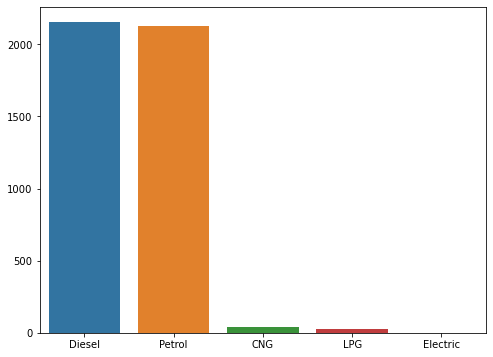

In [19]:
# Fuel type Count

print(data['fuel'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['fuel'].value_counts().index, y = data['fuel'].value_counts().values)
plt.show()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


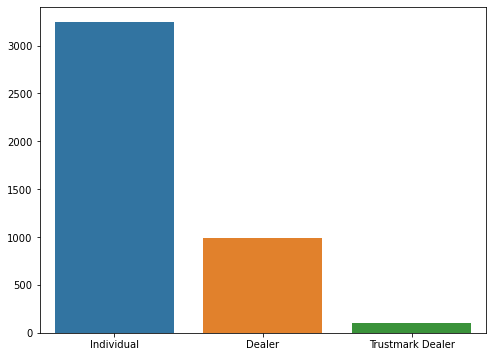

In [20]:
# Seller Type count

print(data['seller_type'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['seller_type'].value_counts().index, y = data['seller_type'].value_counts().values)
plt.show()

Manual       3892
Automatic     448
Name: transmission, dtype: int64


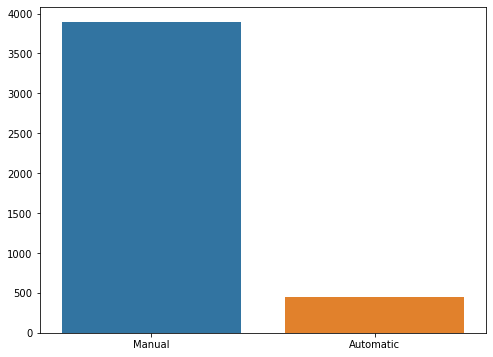

In [21]:
# Transmission type count

print(data['transmission'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['transmission'].value_counts().index, y = data['transmission'].value_counts().values)
plt.show()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


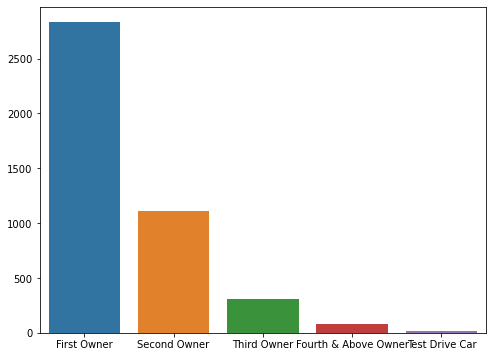

In [22]:
# Owner type count

print(data['owner'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['owner'].value_counts().index, y = data['owner'].value_counts().values)
plt.show()

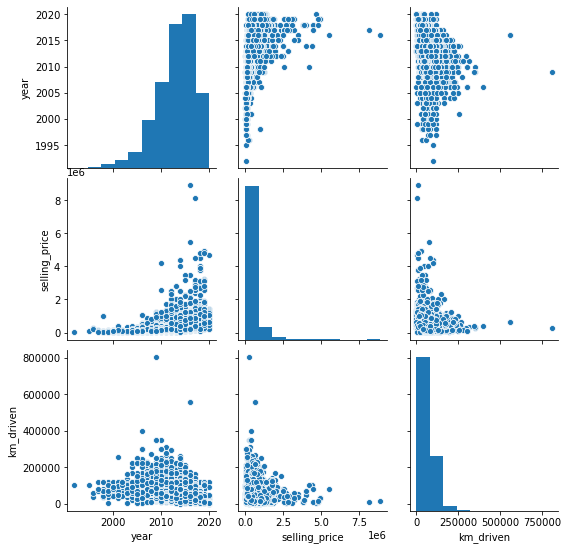

In [129]:
sns.pairplot(data)

## Multivariate Analysis(TBD)

# Featurization

0. Train Test Split
1. Name as Categorical Variable(Ordinal)
2. Year as same(OR #years used)
3. Selling Price as dependent variable 'y'
4. km_driven as same
5. Fuel as Categorical Variable(Ordinal)
6. Seller_type as categorical variable
7. Transmission as Cat Varible(Ordinal)
8. Owner as Cat Variable(Ordinal)

* Convert skewed distributed data columns to Normal distributed for better accuracy of the model.

In [149]:
# Train Test Split

train, val = train_test_split(data, test_size = 0.2)

In [150]:
# Target Encoding for names

encoder = ce.TargetEncoder(cols='name')
train['name'] = encoder.fit_transform(train['name'], train['selling_price'])
val['name'] = encoder.transform(val['name'])

# Ordinal Encoding for 'Fuel' as cost(Electric) > Cost(Diesel) > cost(CNG) > cost(petrol) > cost(LPG)

encoder = ce.OrdinalEncoder(cols=['fuel'], return_df=True, mapping=[{'col':'fuel','mapping':\
            {'Electric':5,'Diesel':4,'CNG':3, 'Petrol':2, 'LPG':1}}])
train['fuel'] = encoder.fit_transform(train['fuel'])
val['fuel'] = encoder.transform(val['fuel'])

# Ordinal Encoding for seller_type as Individuals tend to sell vehicles at cheaper price than Dealers and dealers
# at cheaper price than Trustmark Dealers

encoder = ce.OrdinalEncoder(cols=['seller_type'], return_df=True, mapping=[{'col':'seller_type','mapping':\
            {'Individual':1,'Dealer':2,'Trustmark Dealer':3}}])
train['seller_type'] = encoder.fit_transform(train['seller_type'])
val['seller_type'] = encoder.transform(val['seller_type'])

# Ordinal Encoding for Transmission as Automatic vehicles are more costly than Manual

encoder = ce.OrdinalEncoder(cols=['transmission'], return_df=True, mapping=[{'col':'transmission','mapping':\
            {'Manual':1,'Automatic':2}}])
train['transmission'] = encoder.fit_transform(train['transmission'])
val['transmission'] = encoder.transform(val['transmission'])

# Ordinal Encoding for Owner

encoder = ce.OrdinalEncoder(cols=['owner'], return_df=True, mapping=[{'col':'owner','mapping':\
            {'Test Drive Car':1,'Fourth & Above Owner':2, 'Third Owner':3, 'Second Owner':4,'First Owner':5}}])
train['owner'] = encoder.fit_transform(train['owner'])
val['owner'] = encoder.transform(val['owner'])

X_train = train.drop(['selling_price'], axis = 1)
X_val = val.drop(['selling_price'], axis = 1)
y_train = train['selling_price']
y_val = val['selling_price']

<ipython-input-150-feaee01906e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name'] = encoder.fit_transform(train['name'], train['selling_price'])
<ipython-input-150-feaee01906e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['name'] = encoder.transform(val['name'])
<ipython-input-150-feaee01906e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [91]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner
1267,510874.585829,2017,19014,2,2,1,5
1553,329325.193117,2012,80000,4,1,1,5
171,176141.109393,2011,90000,2,1,1,4
3290,231388.365385,2016,25000,2,1,1,5
2471,510874.585829,2008,110000,4,1,1,5
...,...,...,...,...,...,...,...
4099,532166.969715,2015,68308,4,3,1,5
948,523028.737482,2014,55850,4,2,1,5
2241,235034.041428,2012,110000,2,1,1,4
46,758332.640742,2014,50000,4,1,1,5


# Model Exploration

0. Random Model(Mean Model)
1. Linear Regression
2. SVM with RBF Kernel
3. Random Forest
4. Boosted Trees
5. Neural Network



In [144]:
# Normalize the data

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_val = scalar.transform(X_val)

## Mean and  Median Model

In [159]:
# Deviation from Mean and Median

mean_diff = y_val - y_train.mean()
median_diff = y_val - y_train.median()

Root Mean Squared Error = 581114.93


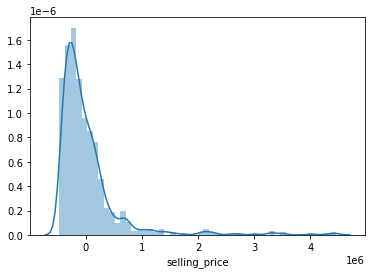

In [178]:
# Plot of Deviation about Mean

print("Root Mean Squared Error = {:.2f}".format(mean_squared_error([y_train.mean()]*len(y_val), y_val,  squared=False)))
sns.distplot(mean_diff)
plt.show()

Median Absolute Deviation about mean = 249802.83


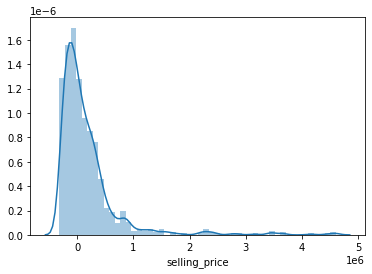

In [174]:
# Plot of Deviation about Median

print("Median Absolute Deviation about mean = {:.2f}".format(median_absolute_error([y_train.mean()]*len(y_val), y_val)))
sns.distplot(median_diff)
plt.show()

## Linear Regression

In [160]:
# Training Linear Reg

reg = LinearRegression(normalize=False, n_jobs=-1).fit(X_train, y_train)

Coefficient of Determination = 0.5713
Root Mean Squared Error on Validation Set = 356121.44
0.5712941375928213


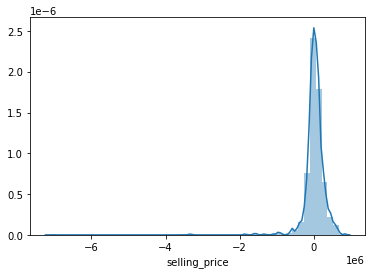

In [161]:
# Evaluation Metrics

y_pred = reg.predict(X_val)
rmse = mean_squared_error(y_pred, y_val, squared=False)

print("Coefficient of Determination = {:.4f}".format(reg.score(X_val, y_val)))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))
print(r2_score(y_val, y_pred))

# Distribution Plot of errors
sns.distplot(y_pred - y_val)
plt.show()

## SVM

In [157]:
# Hyperparameter Tuning: Param:kernel, C(regularization)
# And Training

distributions = dict(kernel=['rbf','poly'], C=[0.1,1,10,100,1000])
reg_svm = SVR()
final_reg_svm = GridSearchCV(reg_svm, distributions)
model_svm = final_reg_svm.fit(X_train, y_train)

In [158]:
# Best Parameters determined by GridSearch

model_svm.best_params_

{'C': 1000, 'kernel': 'poly'}

Coefficient of Determination = 0.2041
Root Mean Squared Error on Validation Set = 485242.37


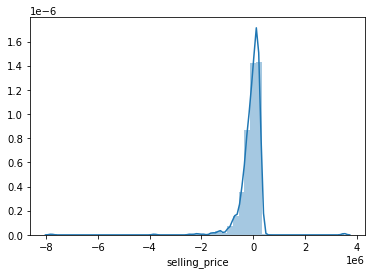

In [159]:
# Evaluation Metrics

y_pred = model_svm.predict(X_val)
rmse = mean_squared_error(y_pred, y_val, squared=False)

print("Coefficient of Determination = {:.4f}".format(model_svm.score(X_val, y_val)))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))

# Distribution Plot of errors
sns.distplot(y_pred - y_val)
plt.show()

## Random Forest

In [135]:
# Hyperparameter Tuning using GridSearch

distributions = dict(n_estimators=[i for i in range(100,1000,200)], criterion=['mae','mse'])

reg_forest = RandomForestRegressor()
model = GridSearchCV(reg_forest, distributions, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse'],
                         'n_estimators': [100, 300, 500, 700, 900]})

In [136]:
model.best_params_

{'criterion': 'mae', 'n_estimators': 500}

Coefficient of Determination = 0.7037
Root Mean Squared Error on Validation Set = 297501.84


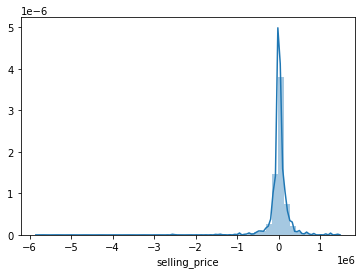

In [137]:
# Evaluation Metrics

y_pred = model.predict(X_val)
rmse = mean_squared_error(y_pred, y_val, squared=False)

print("Coefficient of Determination = {:.4f}".format(model.score(X_val, y_val)))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))

# Distribution Plot of errors
sns.distplot(y_pred - y_val)
plt.show()

## Boosted Trees

In [151]:
# Hyperparameter Tuning using RandomSearch

distributions = dict(loss=['lad','ls'], n_estimators=[100,300,500], max_depth=[3,5,7])
reg_boosting = GradientBoostingRegressor()
model_boosting = RandomizedSearchCV(reg_boosting, distributions, n_jobs=-1)
model_boosting.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'loss': ['lad', 'ls'],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300, 500]})

In [152]:
model_boosting.best_params_

{'n_estimators': 100, 'max_depth': 5, 'loss': 'ls'}

Coefficient of Determination = 0.6862
Root Mean Squared Error on Validation Set = 350089.22


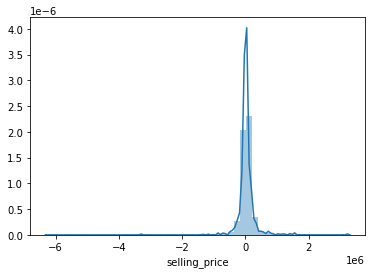

In [153]:
# Evaluation Metrics

y_pred = model_boosting.predict(X_val)
rmse = mean_squared_error(y_pred, y_val, squared=False)

print("Coefficient of Determination = {:.4f}".format(model.score(X_val, y_val)))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))

# Distribution Plot of errors
sns.distplot(y_pred - y_val)
plt.show()

# Conclusion

# References

* https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
* https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/